In [52]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cluster import KMeans

from sklearn import metrics 
from pandas import DataFrame


In [10]:
iris = load_iris()
iris.target[[10, 25, 50]]
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [13]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [14]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

explained variance ratio (first two components): [0.92461872 0.05306648]


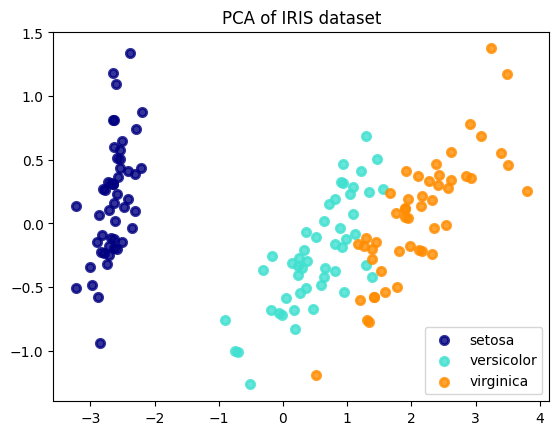

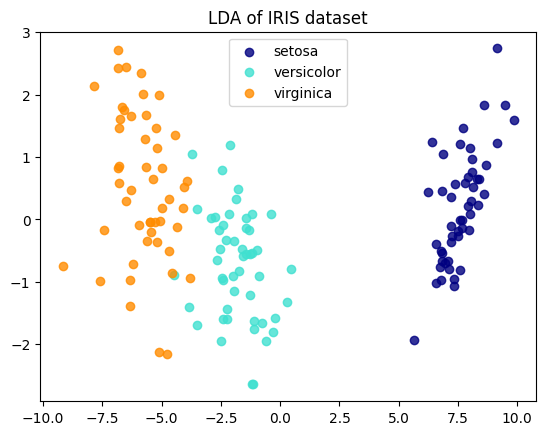

In [16]:
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

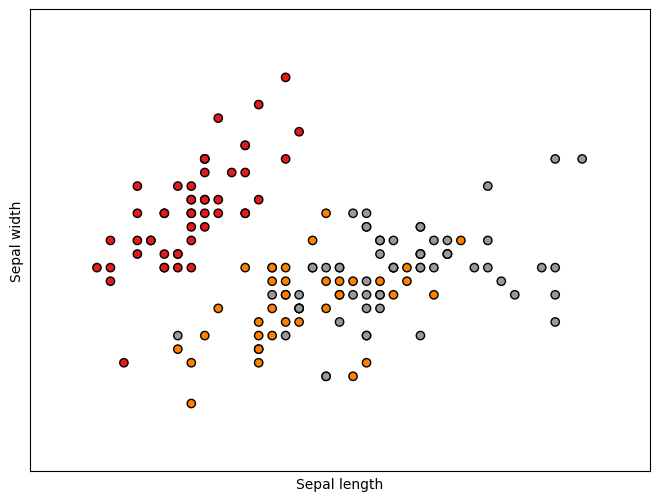

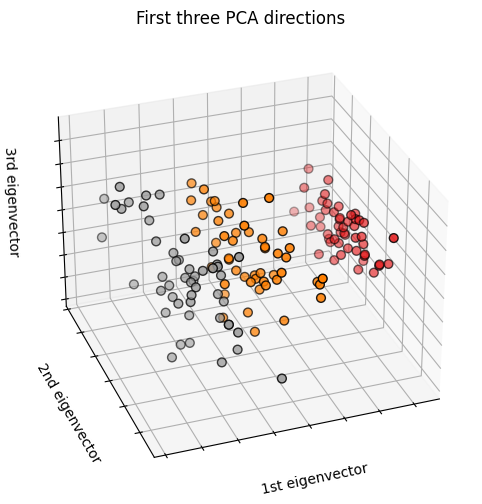

In [17]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [18]:
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

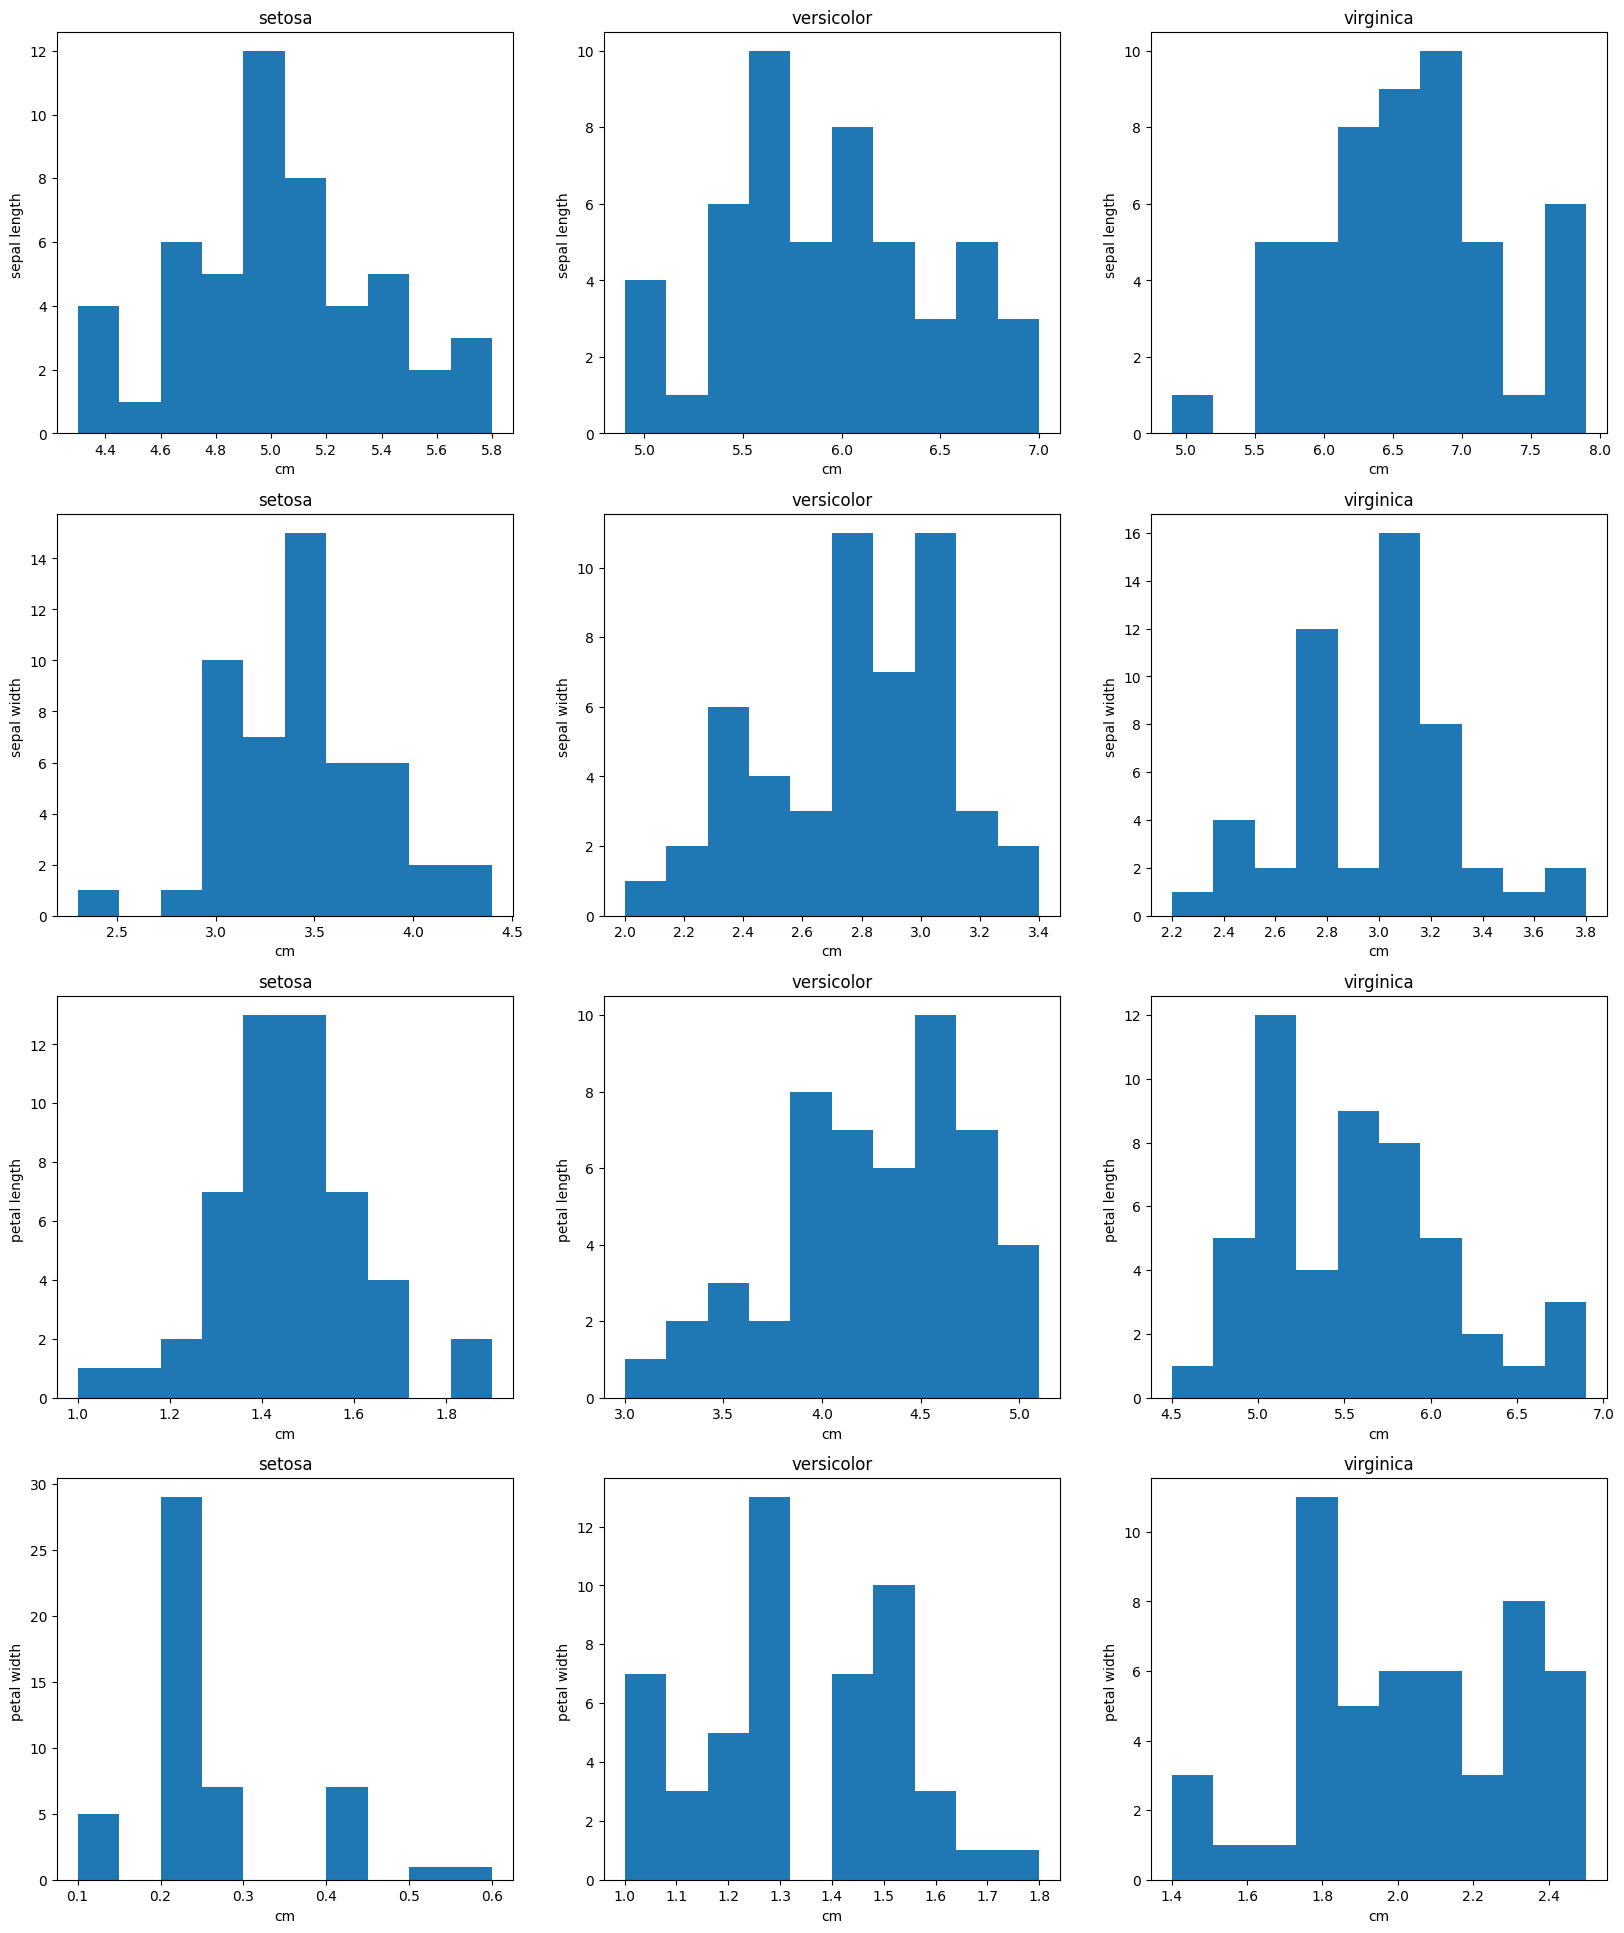

In [39]:
plt.figure(figsize=(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris_frame[iris_frame.name == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])
plt.show()

/home/gea/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


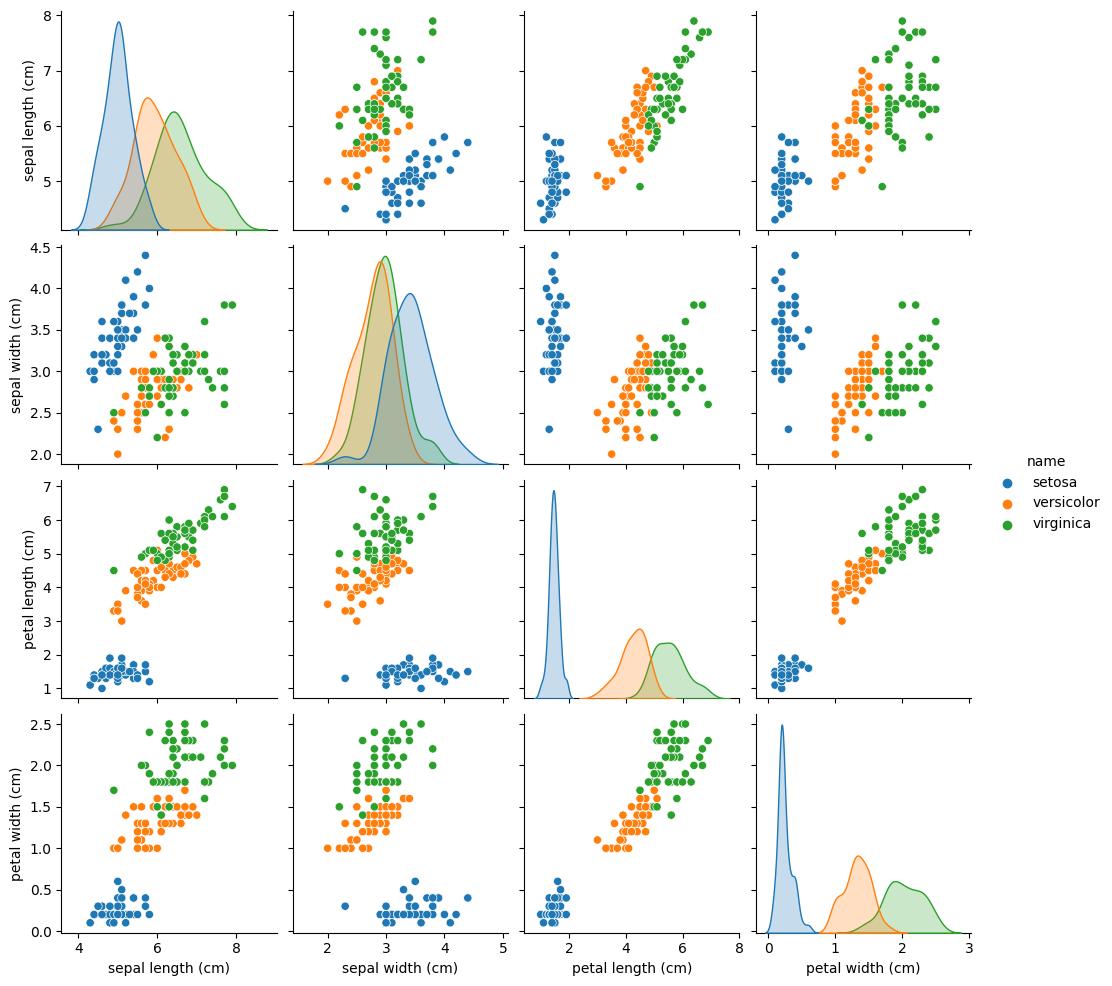

In [41]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

In [45]:
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


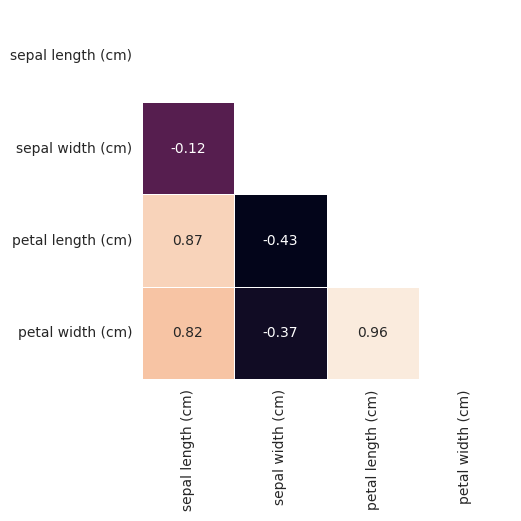

In [47]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

In [78]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[
    ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], 
    iris_frame['target'], 
    test_size = 0.3, 
    random_state = 4)
train_data.head(10)

#print("train_labels=", train_labels)
#print("______")
#print("test_labels=", test_labels)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
13,4.3,3.0,1.1,0.1
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5
91,6.1,3.0,4.6,1.4
116,6.5,3.0,5.5,1.8
...,...,...,...,...
94,5.6,2.7,4.2,1.3
109,7.2,3.6,6.1,2.5
103,6.3,2.9,5.6,1.8
58,6.6,2.9,4.6,1.3


In [70]:
test_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [80]:
train_labels.head(100)

13     0
15     0
61     1
91     1
116    2
      ..
94     1
109    2
103    2
58     1
137    2
Name: target, Length: 100, dtype: int64

In [83]:
test_labels.head(10)

128    2
18     0
130    2
105    2
107    2
78     1
83     1
14     0
5      0
133    2
Name: target, dtype: int64

In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

0.41575541635241114 -0.36307552131902776 0.9628654314027963 4.6750039073255014e-86 0.009582435790766206


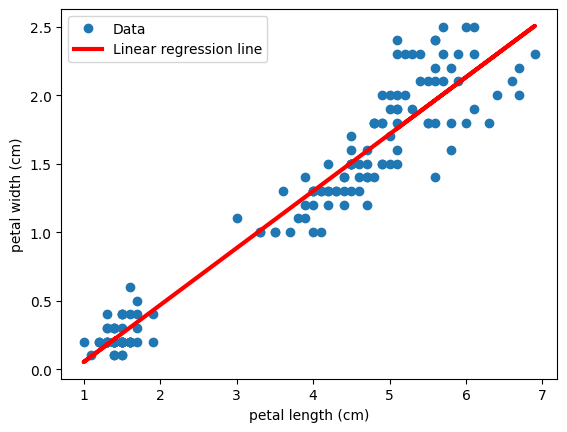

In [85]:
from scipy import polyval, stats
fit_output = stats.linregress(iris_frame[['petal length (cm)','petal width (cm)']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error)
plt.plot(iris_frame[['petal length (cm)']], iris_frame[['petal width (cm)']],'o', label='Data')
plt.plot(iris_frame[['petal length (cm)']], intercept + slope*iris_frame[['petal length (cm)']], 'r', linewidth=3, label='Linear regression line')
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.legend()
plt.show()

In [88]:
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      0.80      0.84        10
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.93      0.93      0.93        45



In [97]:
from sklearn.model_selection import cross_val_score
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print (scores.mean())

0.8572727272727272


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
parameters_grid = {
'max_iter' : range(5,100),
'alpha' : np.linspace(0.0001, 0.001, num = 10),
}
classifier = linear_model.SGDClassifier(random_state = 0)
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.3, random_state = 0)
cv.get_n_splits(train_data, train_labels)
grid_cv = GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)
grid_cv.fit(train_data, train_labels)
print (grid_cv.best_estimator_)

/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/gea/.local/lib/python3.8/site-packages/sklearn

SGDClassifier(alpha=0.0009, max_iter=34, random_state=0)


/home/gea/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [155]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=96, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print (scores.mean())

0.9318181818181819


In [159]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=96, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print (scores.mean())

0.9354545454545455


In [194]:
iris_frame['petal_area'] = 0.0
for k in range(0,150):
    iris_frame['petal_area'][k] = iris_frame['petal length (cm)'][k] * iris_frame['petal width (cm)'][k]
iris_frame.head()


/tmp/ipykernel_25385/636192096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_frame['petal_area'][k] = iris_frame['petal length (cm)'][k] * iris_frame['petal width (cm)'][k]
/tmp/ipykernel_25385/636192096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_frame['petal_area'][k] = iris_frame['petal length (cm)'][k] * iris_frame['petal width (cm)'][k]
/tmp/ipykernel_25385/636192096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,petal_area
0,5.1,3.5,1.4,0.2,0,setosa,0.28
1,4.9,3.0,1.4,0.2,0,setosa,0.28
2,4.7,3.2,1.3,0.2,0,setosa,0.26
3,4.6,3.1,1.5,0.2,0,setosa,0.30
4,5.0,3.6,1.4,0.2,0,setosa,0.28


In [179]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['petal_area']], iris_frame['target'], test_size = 0.3)
model = linear_model.SGDClassifier(alpha=0.001, max_iter=96, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=10)
print (scores.mean())

0.9436363636363637


In [193]:
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.91        17
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



/home/gea/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Создание экземпляра модели и её обучение
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
predictions = model.predict(X_test)

# Вывод первых 5 предсказаний
print(predictions[:5])